# 2.4 Task -Random Forest, Part 1- NK.ipynb

## Table of Contents:

#### **1. Importing Libraries and Data**
- X -> Weather observations (DATASET weather_prediction_dataset_processed.csv) - need date colum
- y -> Pleasant weather presdictions (Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv) -need date column
#### **2. **Data Wrangling**
-  pre-processing data set -
   * a)  **Filter both datasets for 2010s - for Random Forest 1**
     * reshape, remodel, split data
   * b)  **Filter both datasets for 2000s - for Random Forest 2**
     * reshape, remodel, split data
#### **3. Hyperparameter Optimization of Random Forest**
   * a) **2010s Data**
   * b) **Marid Data**
#### **4. Model Evaluation and Feature Importance**
   * a) **2010s Data**
   * b) **Marid Data**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV



In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# path = r'/Users/yourname/Datasets'
path = r'/Users/nancykray/Desktop/CF/Machine Learning /ClimateWins/Data Sets'

In [5]:
# Import X unscaled weather observations data (unscaled)
# Import y predictions data (answers) 
unscaled = pd.read_csv(os.path.join(path, 'DATASET weather_prediction_dataset_processed.csv'), index_col = False)
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)


In [6]:
unscaled.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0             0.7              6.5             0.8   
1                 0             1.1              6.1             3.3   
2                 0             0.0              8.5             5.1   
3                 0             4.1              6.3             3.8   
4                 0             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0                   7                7.7             0.85           1.0032   
1                   8           

In [7]:
unscaled.shape

(22950, 170)

In [8]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [9]:
answers.shape

(22950, 16)

## 2. Data Wrangling

In [10]:
# b) Drop 3 weather stations: all columns related to Tours, Gdansk and Rome from the unscaled dataset

unscaled = unscaled.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [11]:
unscaled.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=149)

In [12]:
# c) Drop columns that end with 'wind_speed' and 'snow_depth'

columns_to_drop = unscaled.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index(['BASEL_wind_speed', 'BASEL_snow_depth', 'DEBILT_wind_speed',
       'DUSSELDORF_wind_speed', 'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth',
       'KASSEL_wind_speed', 'LJUBLJANA_wind_speed', 'MAASTRICHT_wind_speed',
       'MADRID_wind_speed', 'MUNCHENB_snow_depth', 'OSLO_wind_speed',
       'OSLO_snow_depth', 'SONNBLICK_wind_speed', 'VALENTIA_snow_depth'],
      dtype='object')

In [13]:
# c)
unscaled = unscaled.drop(columns=columns_to_drop)

In [14]:
unscaled.shape  # still has date and month column 

(22950, 134)

In [15]:
# Add three new columns cloud_cover, pressure and humidity for three locations and copy the values from the closest weather stations
unscaled[['KASSEL_cloud_cover', 'MUNCHENB_pressue', 'STOCKHOLM_humidity']]=unscaled[['LJUBLJANA_cloud_cover', 'SONNBLICK_pressure', 'OSLO_humidity']].copy()

In [16]:
unscaled.shape #(I can take out month and date after I separate by decade to get back to 135)

(22950, 137)

## -------------------------------------------------------------

### Preprocessing for 2010s data

## a) **2010s unscaled weather observations (x) and predictions/answers (y)**

In [17]:
# Filter weather dataset to 2010s
unscaled_2010s = unscaled[unscaled['DATE'].astype(str).str.startswith('201')] 
unscaled_2010s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
18263                8.4               13.4                     6   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
18263               0.67              1.017                       0.31   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
18263                     0.0                0.7                 5.0   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
18263                3.6                7.8                   4   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
18263             0.78           1.0026                     0.37   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
18263                   0.0              4.2              -1.6   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
18263             -6.3              0.7                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
18263                 0.89               0.9997                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
18263                      0.02                  0.0                  -1.1   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
18263                 -2.8                 -0.6                     2   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
18263               0.77             1.0056                       0.49   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
18263                     0.0                6.4                 1.6   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_humidity  KASSEL_pressure  \
18263               -0.5                5.0             0.93           0.9981   

       KASSEL_global_radiation  KASSEL_precipitation  KASSEL_sunshine  \
18263                     0.12                   0.2              0.0   

       KASSEL_temp_mean  KASSEL_temp_min  KASSEL_temp_max  \
18263              -2.6             -3.0             -1.8   

       LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
18263                      8                0.97              0.9926   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
18263                        0.12                     0.46   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
18263                 0.0                  6.9                 5.5   

       LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  MAASTRICHT_humidity  \
18263                 7.7                       7                 0.91   

       MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
18263               1.0008                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
18263                      0.01                  0.0                  -2.0   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
18263                 -6.1                 -1.1                   5   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
18263             0.82           1.0107         

In [18]:
unscaled_2010s.shape

(3652, 137)

In [19]:
# now drop the date and month for 2010s weather dataset (unscaled_2010s) ->X
unscaled_2010s = unscaled_2010s.drop(columns=['DATE', 'MONTH'])

# Check shape
unscaled_2010s.shape

(3652, 135)

In [20]:
# now do the same for other y dataset (pleasant weather answers)
# filter answers to 2010s

answers_2010s = answers[answers['DATE'].astype(str).str.startswith('201')] 
answers_2010s.head(1)


DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18263                           0                           0   

       VALENTIA_pleasant_weather  
18263                          0

In [21]:
# now drop 'DATE' column
answers_2010s = answers_2010s.drop(columns=['DATE'])

# Check shape
answers_2010s.shape

(3652, 15)

### **CREATE MATRICES**
### Create **y** matrix - COMBINE 15 colums into only 1

In [22]:
# Create y matrix -- combine 15 columns in pleasant weather data into single column
y_1 = answers_2010s.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [23]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [24]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [25]:
# Check shape
y_1.shape

(3652,)

### Create **X** matrix

In [26]:
# Create X matrix
X_1 = unscaled_2010s.to_numpy()

In [27]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


## SPLIT data into training and testing sets


In [28]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [29]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(913, 135) (913,)


### --------------------------------------------------------------------------------

# MADRID - ### Preprocessing Madrid

In [30]:
# Filter weather dataset to only include Madrid
df_madrid = unscaled[unscaled.columns[unscaled.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_madrid.head(1)

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8

In [31]:
# Filter pleasant dataset to only include Madrid
madrid_answers = answers[answers.columns[answers.columns.astype(str).str.startswith('MADRID')]]

# Check output
madrid_answers.head(1)

MADRID_pleasant_weather
0                        0

In [32]:
# Check shape
print(df_madrid.shape)
print(madrid_answers.shape)

(22950, 9)
(22950, 1)


In [33]:
# Create matrices
y_3 = madrid_answers.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [34]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [35]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [36]:
# Create X matrix
X_3 = df_madrid.to_numpy()


## Split data into training and testing sets

In [37]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## --------------------------------------------------------------------------------

## 3. Hyperparameter Optimization of Random Forest
### **a) 2010s Data**

In [38]:
# Create random forest classifier

clf_1a = RandomForestClassifier()

In [39]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_1 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [40]:
# Perform hyperparameter tuning using GridSearchCV

start_1a = time.time()
grid_1a = GridSearchCV(clf_1a,param_grid=grid_space_1,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_1a = grid_1a.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV 2/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.940 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.932 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.950 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.927 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.932 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.930 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max

In [41]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_1a.best_params_))
print('Best GRID search score is: '+str(model_grid_1a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.9689667761956918


**Random Search**

In [42]:
# Create random forest classifier

clf_1b = RandomForestClassifier()

In [43]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_1 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [44]:
# Perform hyperparameter tuning using RandomizedSearchCV

start_1b = time.time()
rf_random_1b = RandomizedSearchCV(clf_1b, rs_space_1, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_1b = rf_random_1b.fit(X_train_1, y_train_1)
print('Search took %s minutes' % ((time.time() - start_1b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END criterion=gini, max_depth=None, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, max_features=9, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.959 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=None, max_features=9, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.959 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=None, max_features=9, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.959 total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=None, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.958 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=None, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.966 total time=   0.5s
[CV 3/3] END criterion=gi

In [45]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_1b.best_params_))
print('Best RANDOM search score is: '+str(model_random_1b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 40, 'max_features': 14, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 110}
Best RANDOM search score is: 0.9675063891931361


In [46]:
# Create a random forest classifier using the best results from the searches

clf_1c = RandomForestClassifier(
    n_estimators = 100, 
    max_depth=None, 
    max_features=15, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [47]:
# Train the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1c.fit(X_train_1, y_train_1)

RandomForestClassifier(max_features=15, min_samples_leaf=2)

In [48]:
# Perform predictions on the test dataset
y_pred_1 = clf_1c.predict(X_test_1)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9813800657174151


#### **b) Madrid Data**

**Grid Search**

In [49]:
# Create random forest classifier

clf_2a = RandomForestClassifier()

In [50]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
grid_space_2 = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [52]:
# Perform hyperparameter tuning using GridSearchCV

start_2a = time.time()
grid_2a = GridSearchCV(clf_2a,param_grid=grid_space_2,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid_2a = grid_2a.fit(X_train_3, y_train_3)
print('Search took %s minutes' % ((time.time() - start_2a)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV 1/3] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.941 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.947 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.949 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.922 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.939 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.949 total time=   0.0s
[CV 3/3] END criterion=ent

In [53]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid_2a.best_params_))
print('Best GRID search score is: '+str(model_grid_2a.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
[CV 1/3] END criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.999 total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.5s
[CV 3/3] END criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=5,

**Random Search**

In [55]:
# Create random forest classifier

clf_2b = RandomForestClassifier()

In [56]:
# Define the parameter grid for hyperparameter tuning using RandomizedSearchCV
rs_space_2 = {
    'max_depth':list(np.arange(10, 100, step=10)) + [None],
    'n_estimators':np.arange(10, 500, step=50),
    'max_features':randint(1,15),
    'criterion':['gini','entropy'],
    'min_samples_leaf':randint(1,4),
    'min_samples_split':np.arange(2, 10, step=2)
}

In [57]:
# Perform hyperparameter tuning using RandomizedSearchCV

start_2b = time.time()
rf_random_2b = RandomizedSearchCV(clf_2b, rs_space_2, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random_2b = rf_random_2b.fit(X_train_3, y_train_3)
print('Search took %s minutes' % ((time.time() - start_2b)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.2118229150772095 minutes


In [58]:
# Randomized search results
print('Best RANDOM search hyperparameters are: '+str(model_random_2b.best_params_))
print('Best RANDOM search score is: '+str(model_random_2b.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [59]:
# Create a random forest classifier using the best results from the searches

clf_2c = RandomForestClassifier(
    n_estimators=10, 
    max_depth=3, 
    max_features=7, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    criterion = 'gini'
)

In [61]:
# Train the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2c.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=10)

In [63]:
# Perform predictions on the test dataset
y_pred_3 = clf_2c.predict(X_test_3)

# Calculate the accuracy of the model
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  1.0
[CV 1/3] END criterion=gini, max_depth=60, max_features=13, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=1.000 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=10, min_samples_leaf=3, min_samples_split=6, n_estimators=210;, score=1.000 total time=   1.3s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=10, min_samples_leaf=3, min_samples_split=6, n_estimators=460;, score=1.000 total time=   2.7s
[CV 1/3] END criterion=gini, max_depth=40, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=360;, score=1.000 total time=   2.1s
[CV 1/3] END criterion=gini, max_depth=20, max_features=13, min_samples_leaf=3, min_samples_split=2, n_estimators=410;, score=1.000 total time=   2.4s
[CV 1/3] END criterion=gini, max_depth=80, max_features=9, min_samples_leaf=1, min_samples_split=2, n_estimators=160;, score=1.000 total time=   0.9s
[CV 1/3] END criterion=gini, max_depth=10, max_features=9, min_samples

## 4. Model Evaluation and Feature Importance

#### **a) 2010s Weather Data**

**Random Forest**

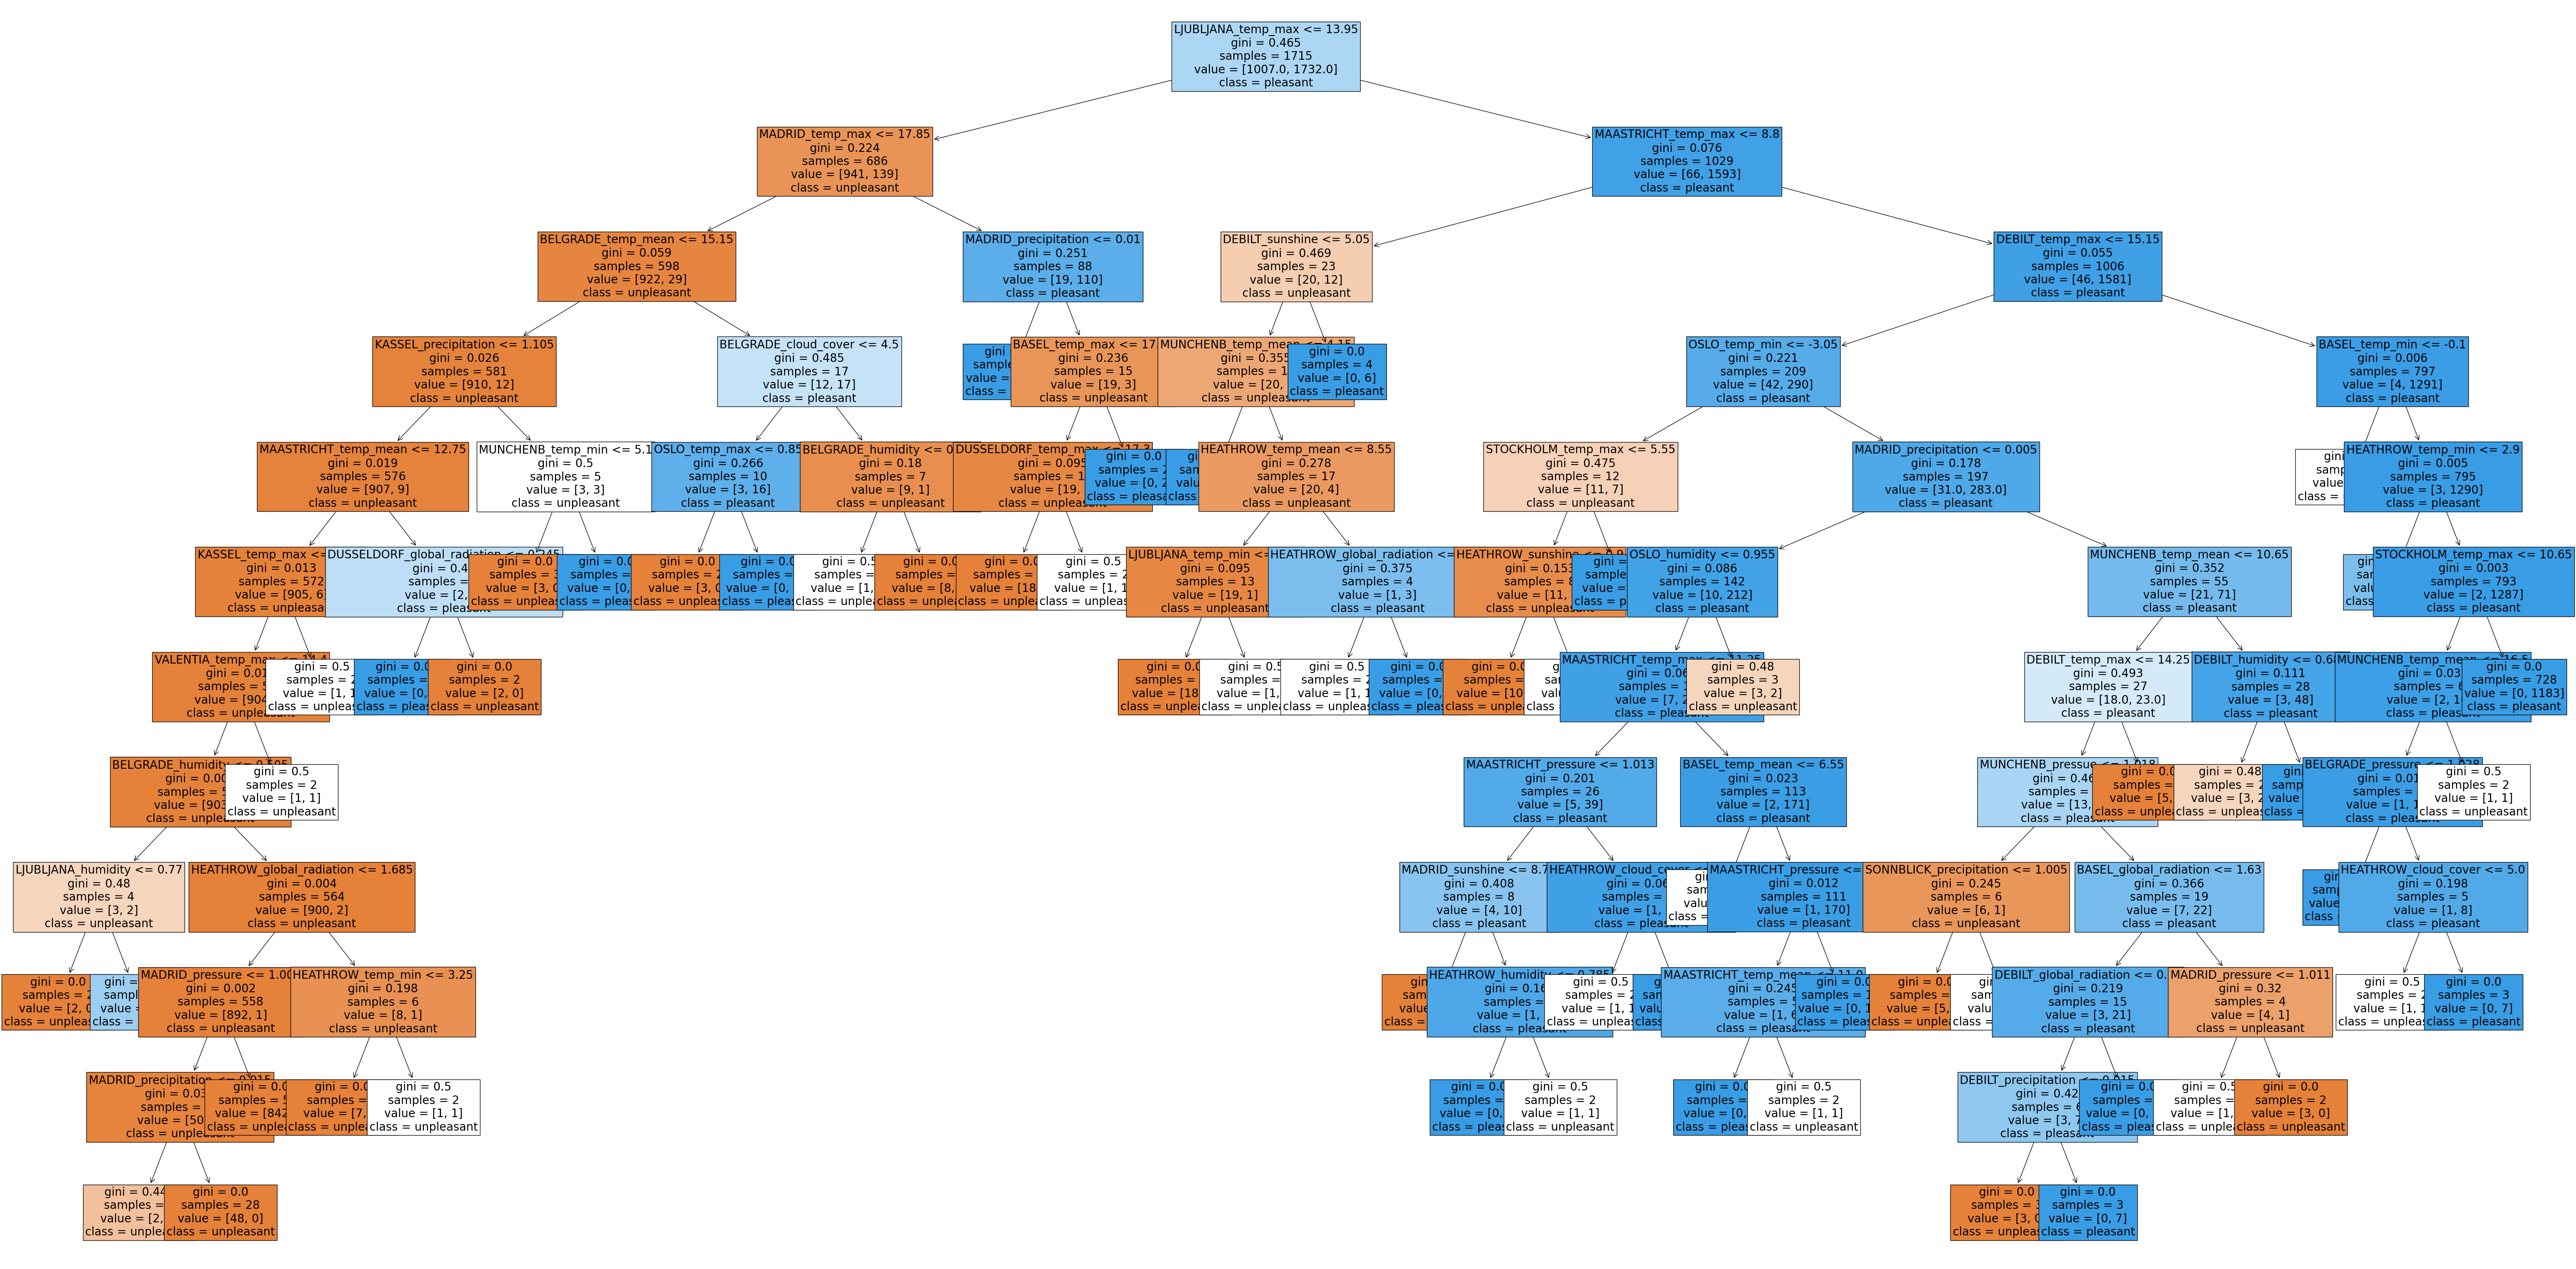

In [68]:
# Plot random forest (2010s)

rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1c.estimators_[5], fontsize = 20, feature_names=unscaled_2010s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [69]:
path

'/Users/nancykray/Desktop/CF/Machine Learning /ClimateWins/Data Sets'

In [70]:
# Save figure
rf_1.savefig(os.path.join(path, 'random_forest_2010s_optimized.png'),bbox_inches='tight')

[CV 1/3] END criterion=gini, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=460;, score=1.000 total time=   2.1s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=1, min_samples_leaf=2, min_samples_split=6, n_estimators=310;, score=0.999 total time=   1.1s
[CV 1/3] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.998 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=4, n_estimators=10;, score=0.997 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=20, max_features=13, min_samples_leaf=1, min_samples_split=2, n_estimators=110;, score=1.000 total time=   0.7s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=60;, score=0.998 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=80, max_features=10, min_samples_leaf=3, min_sa

##### Feature Importances

In [72]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1c.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [2.87971342e-04 6.11070434e-04 8.75295034e-04 1.77728141e-03
 3.13592147e-04 6.17458829e-04 3.83527836e-02 6.54576421e-03
 2.70500856e-02 8.39910525e-04 1.35929732e-03 1.30543642e-03
 9.34440989e-04 3.72571681e-03 1.79677033e-03 3.26153143e-02
 9.01467837e-03 2.58664862e-02 1.66680532e-04 0.00000000e+00
 0.00000000e+00 7.94892742e-04 7.47717838e-04 6.88187869e-04
 1.75629031e-02 1.50738863e-02 7.96664631e-02 3.80858299e-04
 6.70506951e-04 8.96332643e-04 1.90799910e-03 4.16608638e-04
 1.04058256e-03 3.37912689e-03 7.39515944e-04 4.77216050e-02
 2.19628003e-04 4.76925428e-04 8.72114565e-04 2.57665950e-03
 7.23735067e-04 3.43014230e-04 1.78524119e-02 1.00458839e-03
 1.23169112e-02 7.30074580e-04 7.14993657e-04 8.76976225e-04
 3.87582525e-03 5.64607877e-04 1.49790619e-03 2.03260201e-02
 1.53036126e-03 7.75751829e-03 4.20635509e-04 4.55890799e-04
 3.43644288e-04 4.07356193e-04 3.25963549e-04 6.86234824e-04
 4.51815415e-04 1.05419078e-03 3.61168188e-04 1.61505582e-03
 1.

In [73]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [74]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.0764313  0.07745805 0.11470073 0.05715314 0.03638599 0.03787428
 0.0045069  0.13842857 0.05167053 0.24734751 0.07303741 0.04962207
 0.00796492 0.0225492  0.0048694 ]


In [75]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [76]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [77]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.247348
7        LJUBLJANA    0.138429
2         BUDAPEST    0.114701
1         BELGRADE    0.077458
0            BASEL    0.076431
10        MUNCHENB    0.073037
3           DEBILT    0.057153
8       MAASTRICHT    0.051671
11            OSLO    0.049622
5         HEATHROW    0.037874
4       DUSSELDORF    0.036386
13       STOCKHOLM    0.022549
12       SONNBLICK    0.007965
14        VALENTIA    0.004869
6           KASSEL    0.004507


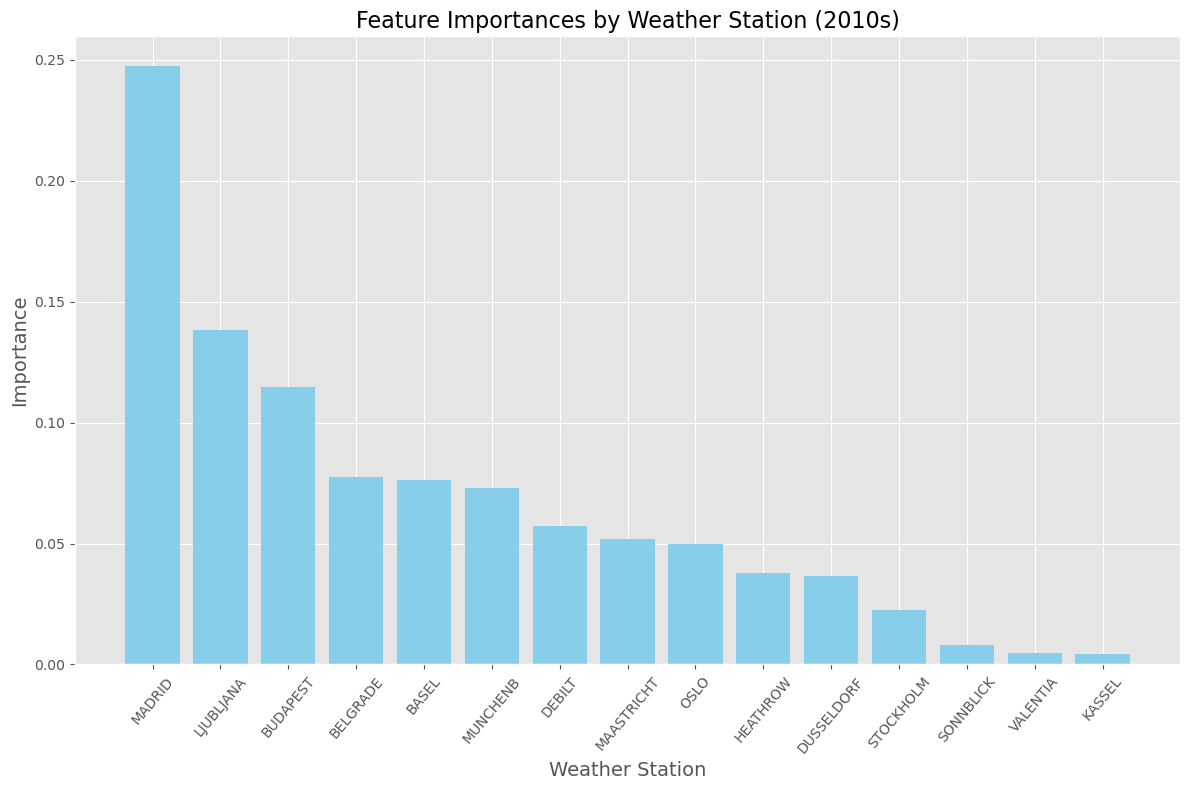

In [78]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

#### **Madrid Data**

**Random Forest**

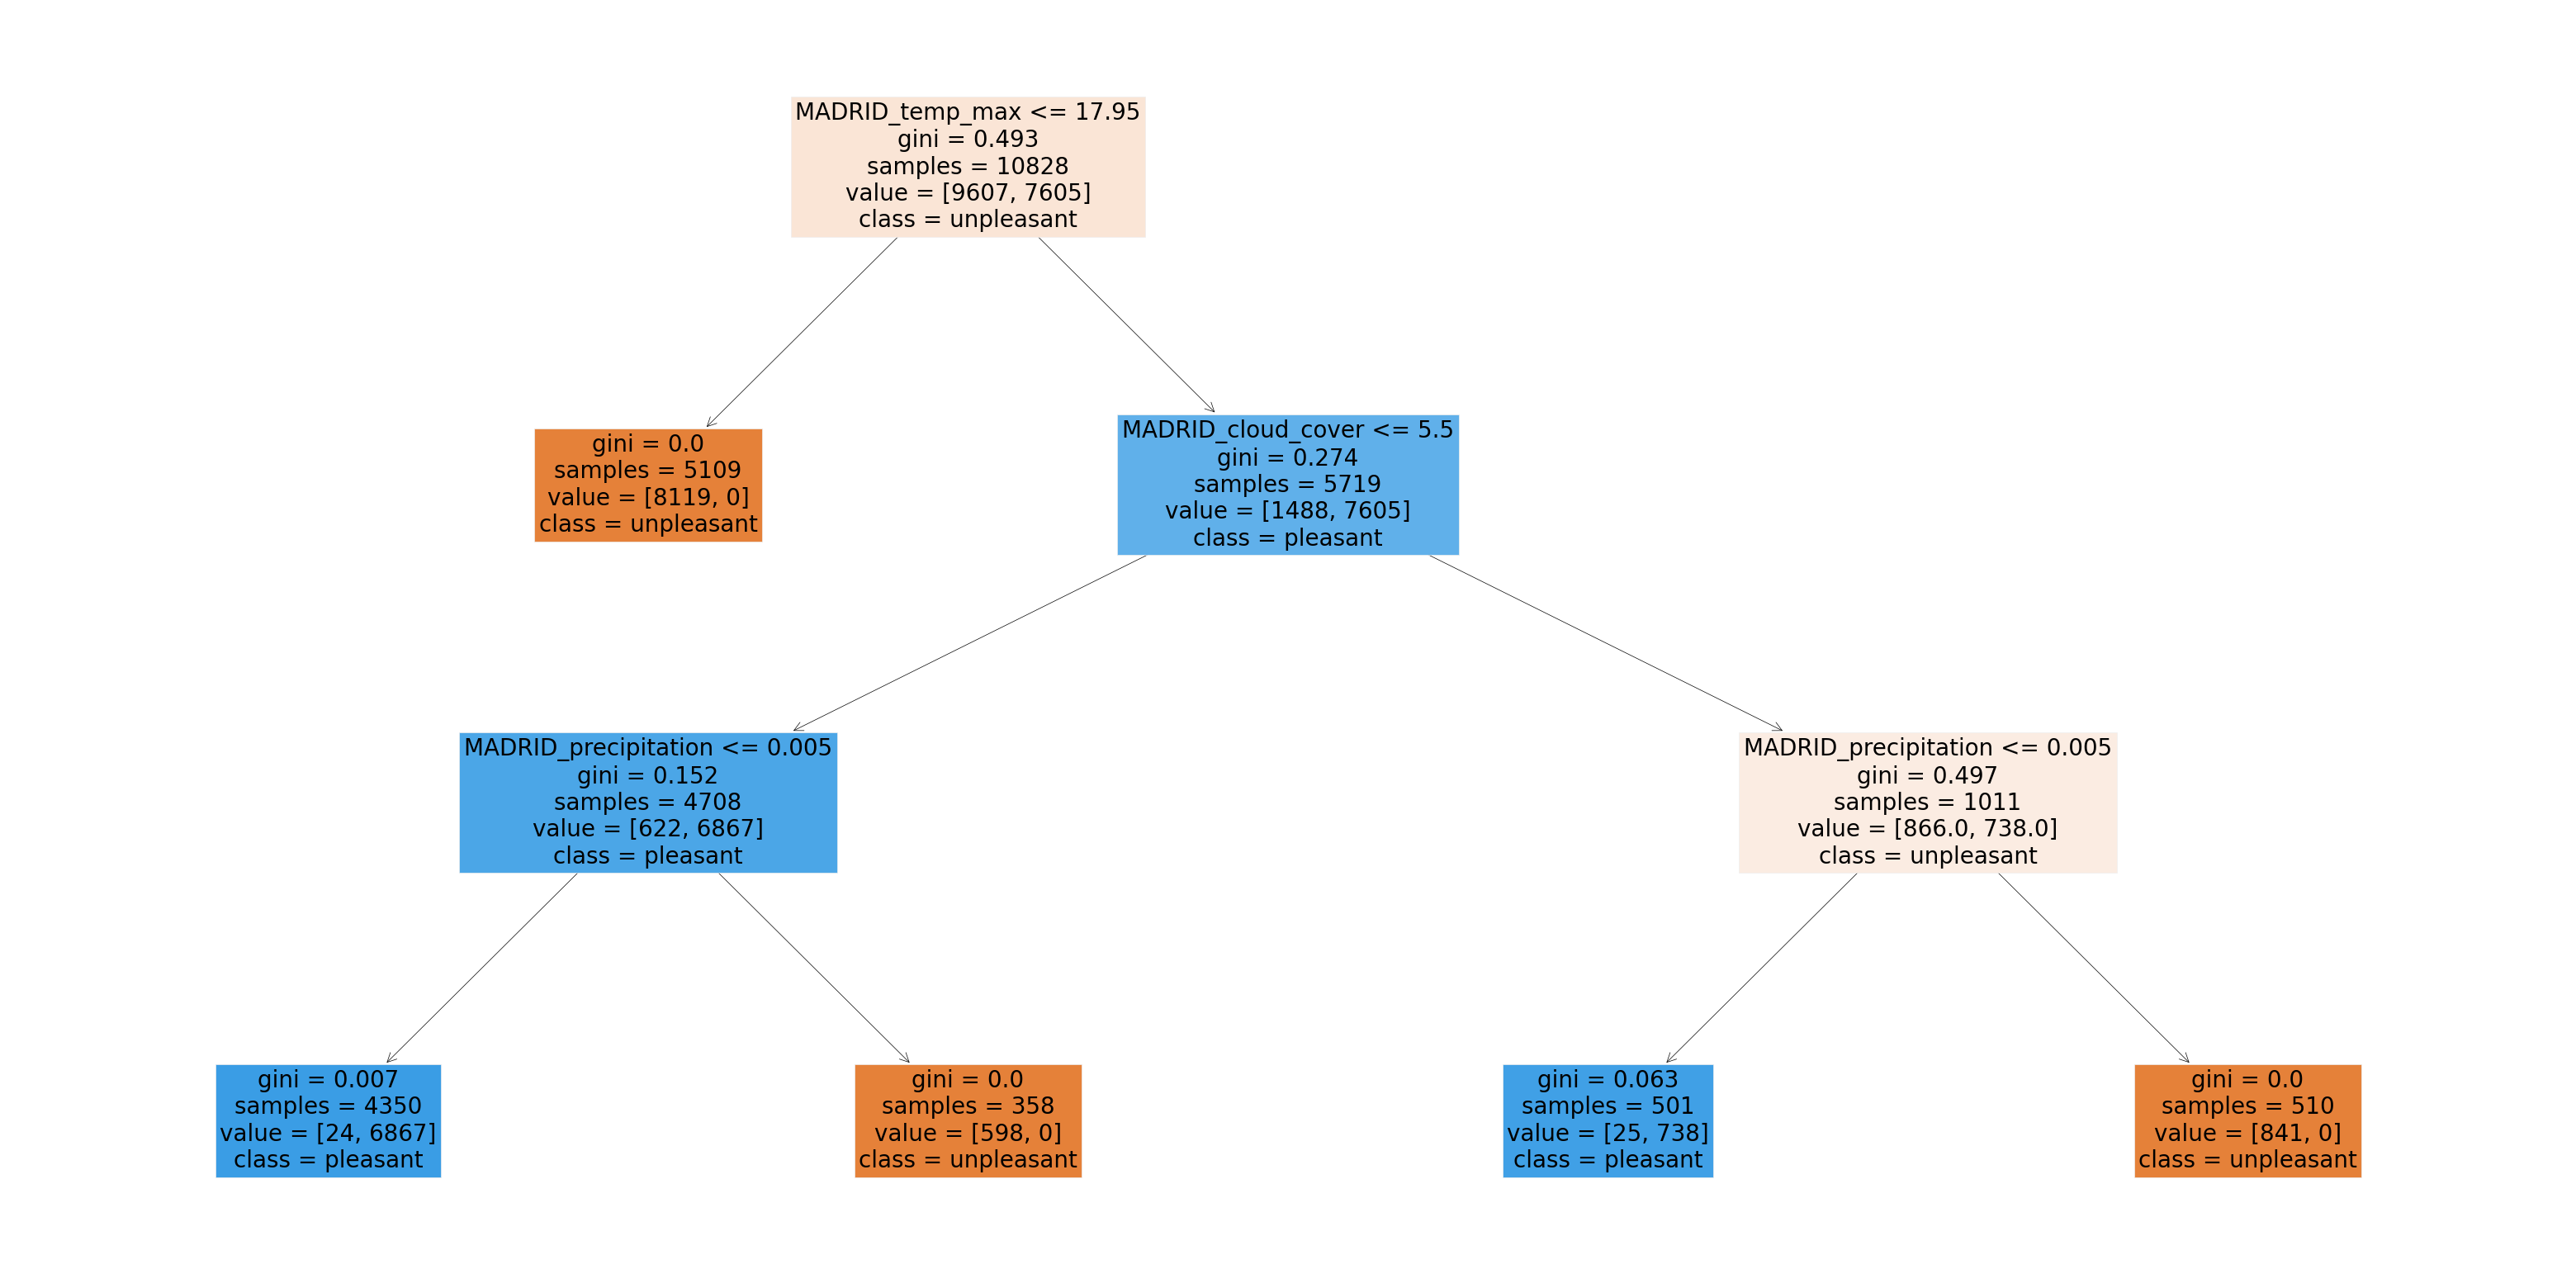

In [80]:
# Plot random forest (Madrid)
rf_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2c.estimators_[5], fontsize = 20, feature_names=df_madrid.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [81]:
# Export the plot
rf_2.savefig(os.path.join(path, 'random_forest_madrid_optimized.png'),bbox_inches='tight')

**Feature Importances**

In [82]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2c.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances: [0.0065698  0.         0.         0.         0.2745613  0.01117909
 0.18597731 0.00257589 0.51913661]
(9,)


In [83]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [84]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_2
})

In [85]:
# Sort by importance for chart readability
importances_df_2 = importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_2)

Feature Importance:
        Measurement  Importance
8          temp_max    0.519137
4     precipitation    0.274561
6         temp_mean    0.185977
5          sunshine    0.011179
0       cloud_cover    0.006570
7          temp_min    0.002576
1          humidity    0.000000
2          pressure    0.000000
3  global_radiation    0.000000


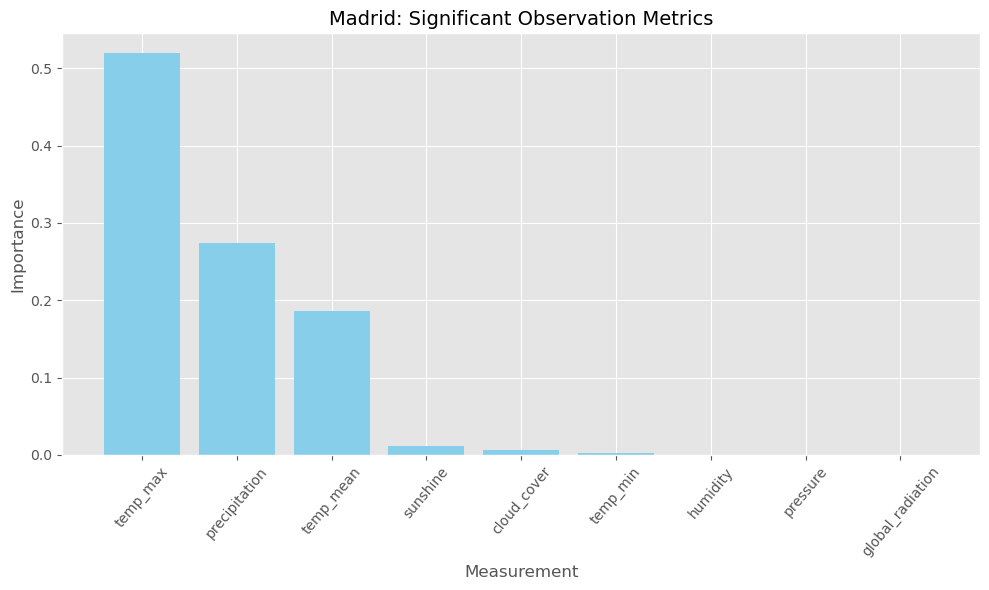

In [86]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_2['Measurement'], importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()